In [1]:
pip install pandas scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import re

In [2]:
data = pd.read_csv(r'C:/Users/Propietario/Desktop/CURSOS/BOOTCAMP/MKT/CLUSTER/DEBER/data_ecu.txt', sep='\t')

In [3]:
print(data)

              Longitude             Latitude
0    -80.43876447751417  -0,9519244059855368
1    -80.42499386576185  -0,7890541493993685
2     -78.4154028108096  -0,0191854793665598
3    -79.91790871558031  -2,1991032880049435
4    -80.48995382890078   -0,496245130223165
..                  ...                  ...
300                 NaN  -0,7903226820506039
301                 NaN  -1,1648682662187593
302                 NaN  -1,2775543355001078
303                 NaN  -0,0955385647887051
304                 NaN  -1,2239505747350763

[305 rows x 2 columns]


In [4]:
print(data.isna().sum())

Longitude    15
Latitude      0
dtype: int64


In [5]:
data=data.dropna(subset=['Longitude'])

In [6]:
print(data)

              Longitude             Latitude
0    -80.43876447751417  -0,9519244059855368
1    -80.42499386576185  -0,7890541493993685
2     -78.4154028108096  -0,0191854793665598
3    -79.91790871558031  -2,1991032880049435
4    -80.48995382890078   -0,496245130223165
..                  ...                  ...
295  -78.40385951154413  -0,1629341346080685
296  -79.92961626007224   -2,097303953893032
297  -78.45114564022248  -0,1159142338099778
298  -80.36705977817206  -0,5186217969768808
299  -78.40715073568926   0,0108195623618471

[290 rows x 2 columns]


In [81]:
print(data.isna().sum())

Longitude    0
Latitude     0
dtype: int64


In [7]:
print(data.dtypes)

Longitude    object
Latitude     object
dtype: object


In [8]:
data['Latitude'] = data['Latitude'].str.replace(',', '.', regex=False)

In [9]:
print(data)

              Longitude             Latitude
0    -80.43876447751417  -0.9519244059855368
1    -80.42499386576185  -0.7890541493993685
2     -78.4154028108096  -0.0191854793665598
3    -79.91790871558031  -2.1991032880049435
4    -80.48995382890078   -0.496245130223165
..                  ...                  ...
295  -78.40385951154413  -0.1629341346080685
296  -79.92961626007224   -2.097303953893032
297  -78.45114564022248  -0.1159142338099778
298  -80.36705977817206  -0.5186217969768808
299  -78.40715073568926   0.0108195623618471

[290 rows x 2 columns]


In [14]:
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')

In [15]:
print(data.dtypes)

Longitude    float64
Latitude     float64
dtype: object


In [19]:
print(data[['Longitude', 'Latitude']].isnull().sum())


Longitude    3
Latitude     0
dtype: int64


In [20]:
data = data.dropna(subset=['Longitude', 'Latitude'])


In [21]:
# Definir el número de clusters
num_clusters = 3

In [22]:
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster_label'] = kmeans.fit_predict(data[['Longitude', 'Latitude']])

C:\Users\Propietario\anaconda3\envs\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Propietario\anaconda3\envs\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [23]:
output_data = pd.DataFrame({
    'location_id': np.arange(len(data)),
    'cluster_label': data['cluster_label']
})

In [26]:
output_data.to_csv('clusters.txt', sep=' ', header=False, index=False)

In [28]:
output_data.to_csv(r'C:/Users/Propietario/Desktop/CURSOS/BOOTCAMP/MKT/CLUSTER/DEBER/clusters.txt', sep=' ', header=False, index=False)

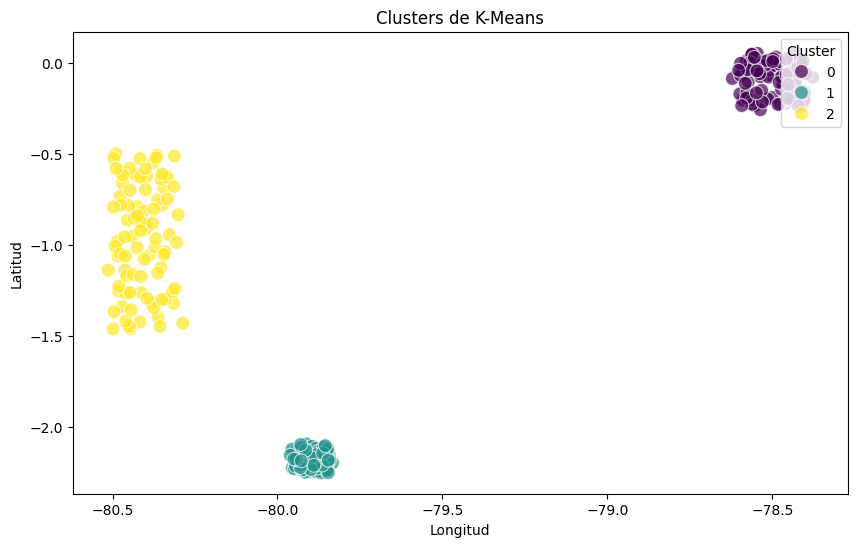

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'data' es tu DataFrame y 'cluster_label' es la columna de etiquetas de los clusters
plt.figure(figsize=(10, 6))

# Usar seaborn para un gráfico más estético
sns.scatterplot(data=data, x='Longitude', y='Latitude', hue='cluster_label', palette='viridis', s=100, alpha=0.7)

# Añadir título y etiquetas
plt.title('Clusters de K-Means')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Cluster', loc='upper right')

# Mostrar el gráfico
plt.show()
